In [1]:
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
def fall_times(jsonfile, log_start=350000, n_files=10, file_indx=-1):
    all_delays = {}
    f = open(jsonfile, 'r')
    data = json.load(f)
    f.close()
    
    for file in data:
        if file_indx!= -1 and f'{file_indx}.txt' not in file:
            continue
        distype, _, n_shards, _, _ = file.split()
        pv, b = data[file]
        delays = []
        
        for shard in pv:
            point_exits = False
            for indx, (i, p, t) in enumerate(pv[shard]):
                if p == -1 and i > b[shard]:
                    #delays.append(t - log_start)
                    if pv[shard][indx-1][1] != -1:
                        delays.append(t - log_start)
                    else:
                        delays.append(t - log_start) 
                    point_exits = True
                    break
            if not point_exits:
                i, p, t = pv[shard][-1]
                delays.append(t - log_start)
                print(file, shard)
                
        delays.sort()
        if (distype, n_shards) in all_delays:
            all_delays[(distype, n_shards)] = [x + y for x, y in zip(all_delays[(distype, n_shards)], delays)]
        else:
            all_delays[(distype, n_shards)] = delays

    for d in all_delays:
        all_delays[d] = [x / n_files for x in all_delays[d]]
    return all_delays

In [3]:
def plot_shards(data, shards, distype, savefile):
    plt.plot(shards, [data[(distype,str(i))][0] for i in shards], label='first')
    plt.plot(shards, [data[(distype,str(i))][len(data[(distype,str(i))]) //2 ] for i in shards], label='mv')
    plt.plot(shards, [data[(distype,str(i))][-1] for i in shards], label='all')
    plt.xlabel('shards')
    plt.ylabel('time')
    plt.title(distype)
    lgd=plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.savefig(savefile, bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.show()

In [4]:
def plot_detected_shards(data, n_shards=32, savefile=None):
    plt.plot(data[('hash',str(n_shards))] , range(1, n_shards + 1), label='hash')
    plt.plot(data[('round',str(n_shards))], range(1, n_shards + 1), label='round')
    plt.xlabel('time')
    plt.ylabel('Number of machines that detected the change')
    lgd=plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    if savefile:
        plt.savefig(savefile, bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.show()

In [5]:
def inv_plot_detected_shards(data, n_shards=32, savefile=None):
    plt.plot( range(1, n_shards + 1), data[('hash',str(n_shards))] , label='hash')
    plt.plot( range(1, n_shards + 1), data[('round',str(n_shards))], label='round')
    plt.xlabel('time')
    plt.ylabel('Number of machines that detected the change')
    lgd=plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    if savefile:
        plt.savefig(savefile, bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.show()

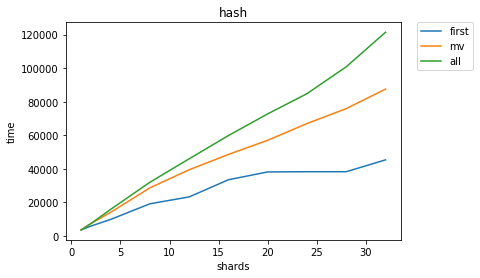

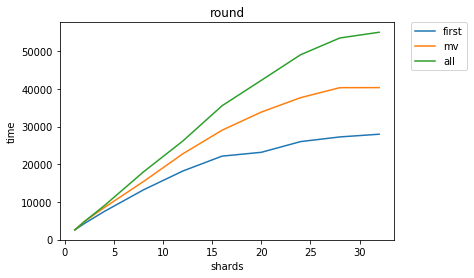

In [6]:
shards = [1,2,4,8,12,16,20,24,28,32]
ad = fall_times('results.json')
plot_shards(ad, shards, 'hash', 'hash.png')
plot_shards(ad, shards, 'round', 'round.png')

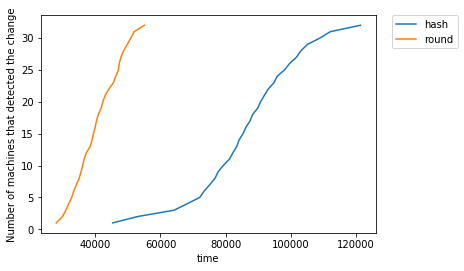

In [8]:
ad = fall_times('results.json')
plot_detected_shards(ad,savefile='last32.png')

In [10]:
# def load_json(jsonfile):
#     with open(jsonfile, 'r') as json_file:
#         s = json_file.read()
#         if s:
#             return json.loads(s)
#         else:
#             return {}

In [13]:
# with open('new_results.json', 'w') as f:
#     f.write('{}')

In [9]:
# jsonfile = 'results.json'
# data = load_json(jsonfile)
# new_data = {}
# for d in data:
#     print(d)
#     if 'hash' in d and '-0.05 500' in d:
#         continue
#     else:
#         new_data[d]=data[d]

# with open(jsonfile, 'w') as jsf:
#         json.dump(new_data, jsf)
